Import Libraries

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime


Read Data

In [283]:
df=pd.read_csv('airline.csv')

In [284]:
df.head(3)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time


Check for null Values

In [285]:
df.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

Check for duplicates

In [286]:
df.duplicated().value_counts()

False    98619
dtype: int64

In [287]:
df.shape

(98619, 15)

<h1>There seems to be no null vlaues or any duplicate values</h1>

<p>Gender Distribution in the data</p>

In [288]:
# Define the bin edges and labels
bins = [0, 20, 60, 100]
labels = ['Teen', 'Adult', 'Old']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

In [289]:
passenger = df[['Passenger ID','Gender','Age']]

In [290]:
df.head(3)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,age_group
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time,Old
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time,Old
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time,Old


In [291]:
age_group_total = df['age_group'].value_counts()
age_group_total

Adult    44027
Old      32772
Teen     21820
Name: age_group, dtype: int64

In [292]:
age_group_total = age_group_total.to_frame()
age_group_total.reset_index(inplace=True)
age_group_total.columns=['Age_Group','Total_Count']
age_group_total


,Age_Group,Total_Count
0,Adult,44027
1,Old,32772
2,Teen,21820


Text(0.5, 0, 'Age Groups')

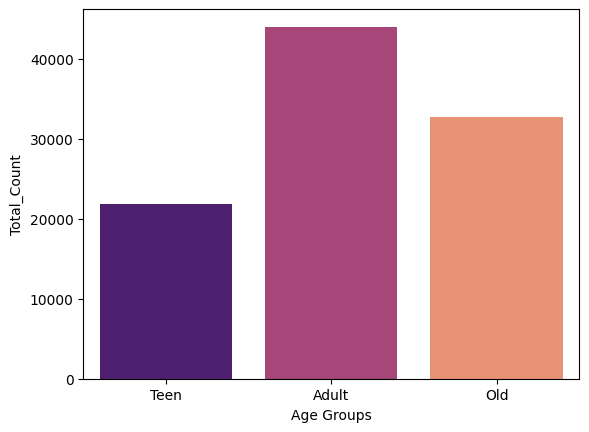

In [293]:
sns.barplot(data=age_group_total,x='Age_Group',y='Total_Count',palette='magma')
plt.xlabel('Age Groups')

The adult category was most dominat while travelling in this data

In [294]:
df.head(2)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,age_group
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time,Old
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time,Old


In [295]:
total_by_nationality = df['Nationality'].value_counts()

In [296]:
top_10_nationality = total_by_nationality.head(10)

In [297]:
print('These are the top 10 Nationality')
top_10_nationality

These are the top 10 Nationality


China            18317
Indonesia        10559
Russia            5693
Philippines       5239
Brazil            3791
Portugal          3299
Poland            3245
France            2907
Sweden            2397
United States     2105
Name: Nationality, dtype: int64

<Axes: >

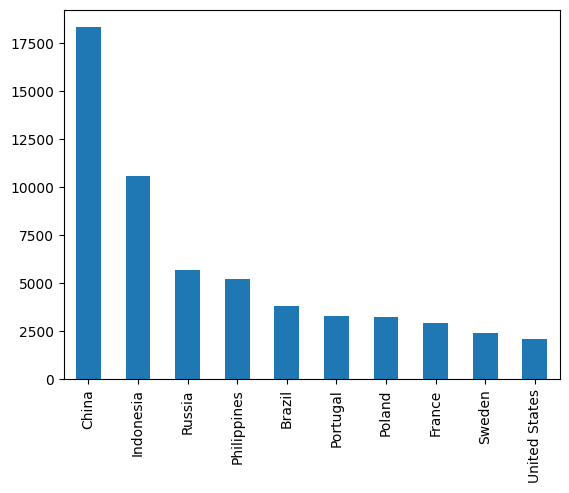

In [298]:
top_10_nationality.plot(kind='bar')

In [299]:
flights_status = df['Flight Status'].value_counts()

<Axes: >

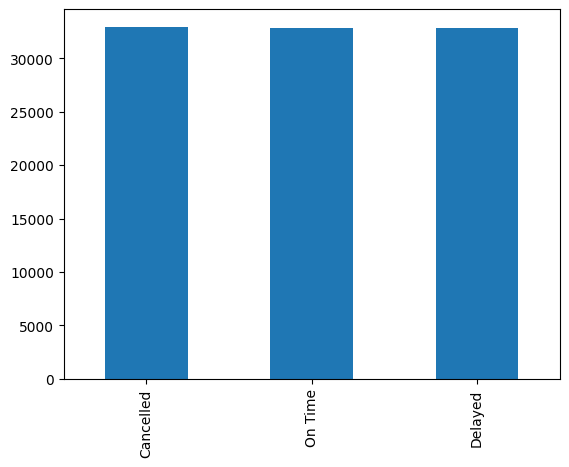

In [300]:
flights_status.plot(kind='bar')

Change departure Date Column Datatype to datetime

In [301]:
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Passenger ID          98619 non-null  object        
 1   First Name            98619 non-null  object        
 2   Last Name             98619 non-null  object        
 3   Gender                98619 non-null  object        
 4   Age                   98619 non-null  int64         
 5   Nationality           98619 non-null  object        
 6   Airport Name          98619 non-null  object        
 7   Airport Country Code  98619 non-null  object        
 8   Country Name          98619 non-null  object        
 9   Airport Continent     98619 non-null  object        
 10  Continents            98619 non-null  object        
 11  Departure Date        98619 non-null  datetime64[ns]
 12  Arrival Airport       98619 non-null  object        
 13  Pilot Name      

Extract Month

In [303]:
df['Month'] = df['Departure Date'].dt.month

In [304]:
df.head(3)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,age_group,Month
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Fransisco Hazeldine,On Time,Old,6
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Marla Parsonage,On Time,Old,12
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Rhonda Amber,On Time,Old,1


In [305]:
total_flights = df['Month'].value_counts().sort_values(ascending=True)

In [306]:
total_flights=total_flights.to_frame()

In [307]:
total_flights.reset_index(inplace=True)

In [308]:
total_flights.columns =['Month','Total_flights']

In [309]:
total_flights = total_flights.sort_values(by='Month')

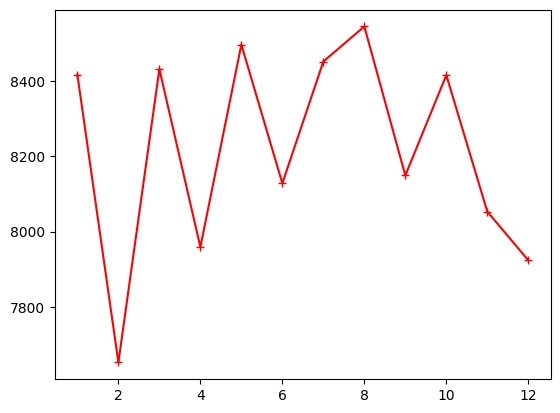

In [310]:
plt.plot(total_flights['Month'],total_flights['Total_flights'],marker='+',color='red')


<Axes: xlabel='Age', ylabel='Gender'>

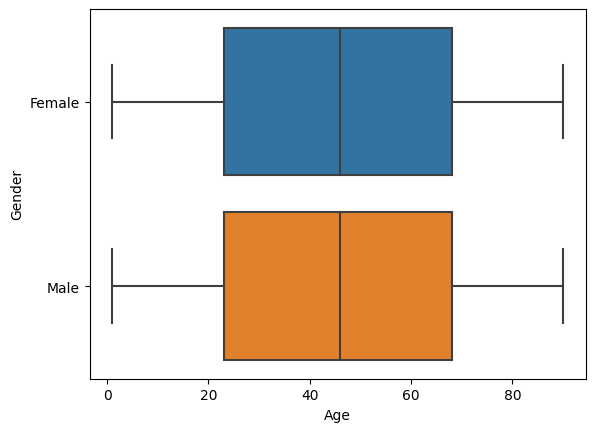

In [311]:
sns.boxplot(x=df['Age'], y=df['Gender'])

From the Boxplot above and the bar graph earlier, Gender distribution seems to be equal

Import libraries for Flight delay prediction

In [312]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

extract day of the week

In [313]:
df['Day_of_Week'] = df['Departure Date'].dt.dayofweek

In [314]:
df.head(3)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,age_group,Month,Day_of_Week
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Fransisco Hazeldine,On Time,Old,6,1
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Marla Parsonage,On Time,Old,12,0
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Rhonda Amber,On Time,Old,1,1


In [315]:
# Adding one to the day of the week to make it start from 1 instead of 0

df['Day_of_Week'] = df['Day_of_Week'] + 1

In [316]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,age_group,Month,Day_of_Week
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Fransisco Hazeldine,On Time,Old,6,2
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Marla Parsonage,On Time,Old,12,1
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Rhonda Amber,On Time,Old,1,2
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Kacie Commucci,Delayed,Old,9,5
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Ebonee Tree,On Time,Adult,2,5


In [317]:
daysofweek = df['Day_of_Week'].value_counts().reset_index()

In [322]:
daysofweek

,index,Day_of_Week
0,7,14289
1,5,14227
2,4,14227
3,2,14048
4,1,14032
5,3,13939
6,6,13857


Majority of people travel on Sundays, mondays and Tuesdays, as they progress towards the end of the week, movement decreases.

In [323]:
# preparing the features

features = ['Airport Name', 'Country Name', 'Airport Continent', 'Day_of_Week', 'Month']
X = df[features].copy()

Import Libraries for Machine Learning Model

In [324]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [325]:
# Encoding the categorical features

le = LabelEncoder()

for item in features:
    X[item] = le.fit_transform(X[item])

In [327]:
X.shape

(98619, 5)

In [328]:
# scaling the features

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [331]:
X.shape

(98619, 5)

In [332]:
# handling the Target variable

y = df['Flight Status'].copy().apply(lambda x: 1 if x == 'Delayed' else 0)

In [334]:
# Split the data into features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Selection

In [339]:
classifiers = {
    'XGBClassifier' : XGBClassifier(),
    'DecisionTreeCLassifier' : DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier()
}


for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'{name}:\nAccuracy = {accuracy:.2f}\n')
    print(report)
    print('=' * 80)

XGBClassifier:
Accuracy = 0.66

              precision    recall  f1-score   support

           0       0.66      0.99      0.79     13069
           1       0.33      0.01      0.02      6655

    accuracy                           0.66     19724
   macro avg       0.49      0.50      0.41     19724
weighted avg       0.55      0.66      0.53     19724

DecisionTreeCLassifier:
Accuracy = 0.55

              precision    recall  f1-score   support

           0       0.66      0.66      0.66     13069
           1       0.34      0.34      0.34      6655

    accuracy                           0.55     19724
   macro avg       0.50      0.50      0.50     19724
weighted avg       0.55      0.55      0.55     19724

RandomForestClassifier:
Accuracy = 0.59

              precision    recall  f1-score   support

           0       0.66      0.76      0.71     13069
           1       0.34      0.24      0.28      6655

    accuracy                           0.59     19724
   macro avg  

XGBClassifier and GradientBoostingClassifier has the highest accuracy